# K-plus proches voisins (K-NN)

<img src="./figures/knn.jpg" width="700px"/>

<div class="alert alert-block alert-info">
    
Soit un **train set** composé de $N$ observations:

$$
S_{\rm train} = \left\{ \left( \boldsymbol{x_1}, y_1 \right), \dots, \left( \boldsymbol{x_N}, y_N \right) \right\}.
$$

La matrice des **features** $\boldsymbol{X}$ et le vecteur (ou matrice) des **targets** $\boldsymbol{y}$ sont définis de la manière suivante:

$$
\boldsymbol{X} =
\begin{pmatrix}
\boldsymbol{x_1}^T \\
\vdots \\
1\boldsymbol{x_N}^T 
\end{pmatrix}
=
\begin{pmatrix}
x_{11} & \cdots & x_{1p} \\
\vdots & \ddots & \vdots \\
x_{N1} &\cdots & x_{Np}
\end{pmatrix}~
\text{  et  }~
\boldsymbol{y} =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N 
\end{pmatrix}
$$


L'algorrithme des **K plus proches voisins** ou **K-Nearest Neighbors (KNN)** est le suivant:
    
<img src="./figures/knn_algo.jpg" width="700px"/>
    
</div>

## Exercice


### Generate data
1. Le code de cette section génère des data appartenant à 3 classes différentes.<br>
   Les cluster sont relativement séparés et devraient pouvoir être prédits de manière acceptable grâce à l'algorithme des **K plus proches voisins** ou **K-Nearest Neighbors**.<br>
   Comprenez ce code...
   
   
### Model
2. Compétez la méthode `fit(...)` qui, étant donné un ensemble de points `X_train, y_train` (**features** et **targets**), assigne simplement `X` et `y` comme des attributs de la classe. Ainsi, ces éléments peuvent être récupérés et utilisés dans des méthodes suivantes.


3. Compétez la méthode `_get_distances_and_targets(...)` qui, étant donné un point `x_new`, calcule les distances et les targets des $k$ points de `X` qui sont les plus proches de lui. La documentation de la méthode donne plus de détails.<br>
   Si besoin, la fonction `sorted(dist_and_targets, key = lambda x : x[0])` trie une liste de tuples en fonction de leurs premiers éléments...


4. Compétez la méthode `predict(...)` qui, étant donné un point `x_new`, calcule la prédiction `y_new_hat` associée à ce point. La documentation de la méthode donne plus de détails.<br>
    - En **mode classifieur**, la prédiction `y_new_hat` correspond à la target qui apparaît le plus fréquement parmi les $K$ plus proches voisins.
    Si besoin, la fonction `Counter(targets).most_common()[0][0]` permet d'extraire la target qui apparaît le plus souvent dans la liste `targets`...
    - En **mode régresseur**, la prédiction `y_new_hat` correspond à la moyenne des targets des $K$ plus proches voisins.


5. Instanciez un KNN avec $K=5$ et effectuez quelques prédictions sur des points de votre choix.

### Results
4. - Instanciez un KNN avec $K=5$;
   - Créez un ensemble de points `points` qui couvrent bien tout votre espace $X_1 \times X_2$.<br>
   Si besoin, vous pouvez utiliser les instructions
   ```
   np.linspace(x1_min, x1_max, num=50)
   np.linspace(x2_min, x2_max, num=50)
   ```
   avec `x1_min, x1_max, x2_min, x2_max` appropriés.
   - Calculez les prédictions associées à tous ces points.
   - Faites le graphes des prédictions de tous ces points. Les points qui sont prédits comme classe 1, classe 2 et classe 3 seront représentés de différentes couleurs. Vous devrez voir apparaître des régions colorées correspondant aux zones de décision de votre classifieur.


5. Répétez l'opération avec des KNN pour $K=1$ et $K=200$. Que remarquez-vous?

## Libraries

In [1]:
from collections import Counter

import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme()

## Generate data

In [2]:
# generate data
X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=4.0, random_state=42)

In [3]:
X.shape, y.shape

((500, 2), (500,))

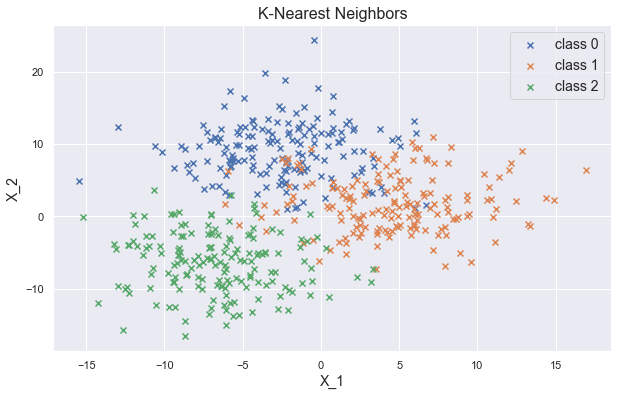

In [4]:
# plot data
plt.figure(figsize=(10, 6))

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker = 'x', label="class 0")
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker = 'x', label="class 1")
plt.scatter(X[y==2][:, 0], X[y==2][:, 1], marker = 'x', label="class 2")
plt.xlabel("X_1", fontsize=14)
plt.ylabel("X_2", fontsize=14)
plt.legend(fontsize=14)
plt.title("K-Nearest Neighbors", fontsize=16)

# plt.savefig("knn.jpg")
plt.show()

## Model

In [5]:
class KNN():
    """
    Implements the K-Nearest Neighbors (K-NN) algorithm.
    """
    
    def __init__(self, k=1, mode="classification"):
        """
        Constructor.
        
        Parameters
        ----------
        
        k : int
            Number of neighbors.
        mode : str
            Either "classification" or "regression"
        """
        
        # à compléter...
        pass
        
    
    def fit(self, X, y):
        """
        Set the points X and their targets y as attributes of the class.
        In this way, X and y can be used in further methods.
        
        Parameters
        ----------
        X : ndarray
            Initial points of dim N x p.
        y : ndarray
            Targets of the initial points of dim N or (N x p').
        
        """
        # à compléter...
        pass
    
    
    def _get_distances_and_targets(self, x_new):
        """
        Given a new point, this function computes the distances and targets
        between the new point x_new and the points of X.
        The distances and targets are stored in a list of the form:
        
        dist_and_targets = [[d1, t1], [d2, t2], [d3, t3], ...
        
        where:
        - di is the distance between x_new and the i-th point of X;
        - t1 is the target of the i-th point of X.
        
        Afterwards, the pairs of dist_and_targets is sorted according 
        to their first elements and the k first elements selected.
        The distances of the k first elements of dist_and_targets
        form the list of distances to be returned.
        The targets of the k first elements of dist_and_targets
        form the list of targets to be returned.
        
        
        Parameters
        ----------
            New point of dim p to be classified by the K-NN algo.
            
        Returns
        -------
        dist, targets : list, list
            list of distances and list of targets associated with
            x_new and the initial points X.
            Cf. above documentation for further details.
        """
        
        # à compléter...
        pass
        
        
    def predict(self, x_new):
        """
        Computes the predictions associated to a new point x_new.
        The predictions are computed as follows:
        - compute the distances and targets between x_new and X using
          the method get_distances_and_targets.
        - In the classification mode, return the most common target 
          of this array of k elements.
        - In the regression mode, return the mean of the targets 
          of this array of k elements.
        
        Parameters
        ----------
        x_new : Union[ndarray, list]
            New point of dim p to be classified by the KNN algo.
            
        Returns
        -------
        y_new_hat : Union[int, float]
            Prediction for the point x_new (class or value).
        """
        
        # à compléter...
        pass

## Results